## IMPORTING LIBRARIES

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import warnings


In [73]:
# Here we are setting an option to show the full width of the column, all the colums will be displayed, along with that 2000 rows will be displayed for eacb column.
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 200
warnings.filterwarnings('ignore')

# Load the dataset

In [76]:
# Load the dataset
file_path = 'Netflix Userbase.csv'
netflix_data = pd.read_csv(file_path)
netflix_data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [78]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


# Customer Segmentation

##### The goal is to group users based on shared characteristics such as demographics, subscription preferences, and usage behavior. These segments help businesses understand different user groups and tailor marketing, product offerings, and customer retention strategies.



#### Age distribution:

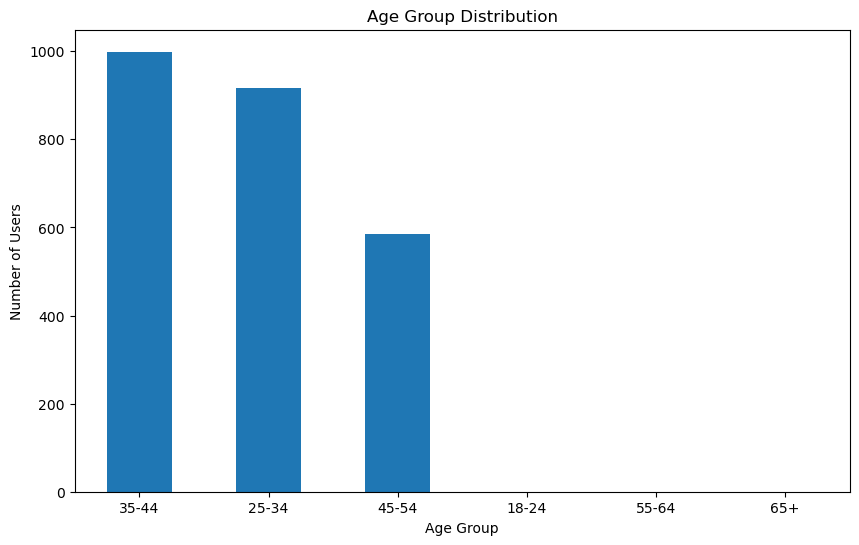

In [82]:
# Define age groups
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age group column
netflix_data['Age Group'] = pd.cut(netflix_data['Age'], bins=age_bins, labels=age_labels)

# Plot age group distribution
age_group_distribution = netflix_data['Age Group'].value_counts()

age_group_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

#### Gender distribution

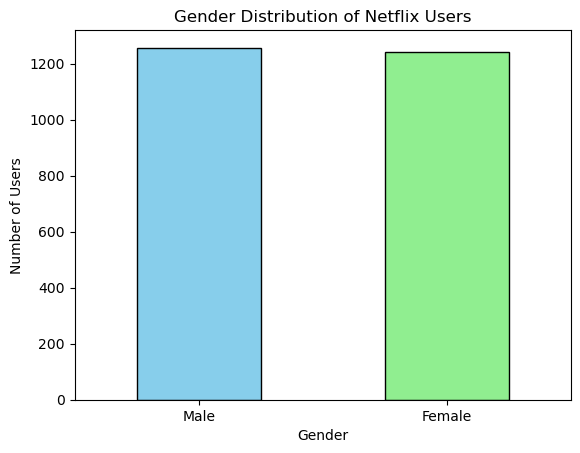

In [85]:
# Gender distribution
netflix_data['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Gender Distribution of Netflix Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

#### Country distribution

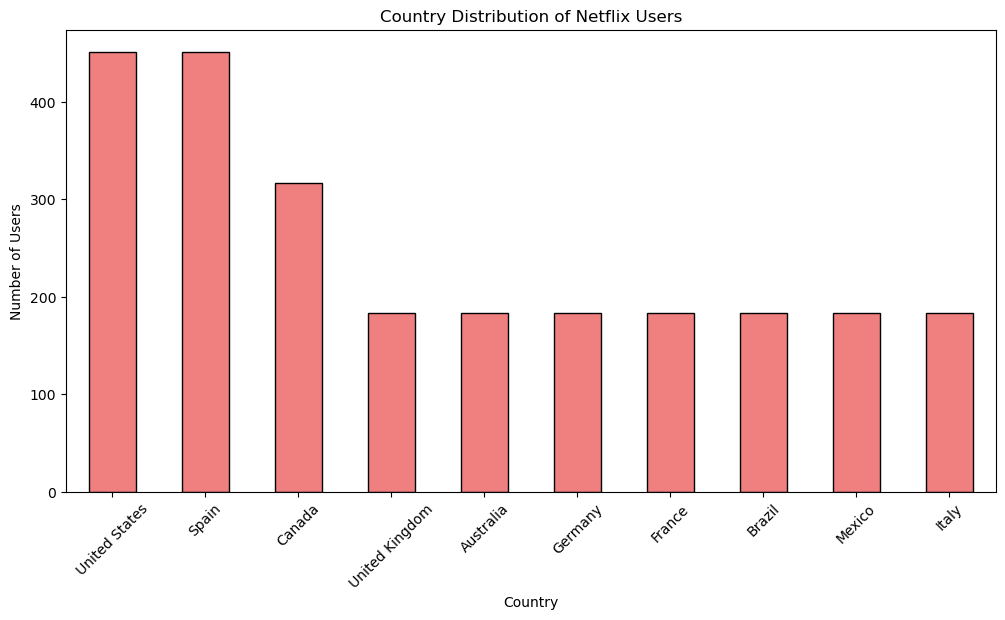

In [88]:
# Country distribution
netflix_data['Country'].value_counts().plot(kind='bar', figsize=(12, 6), color='lightcoral', edgecolor='black')
plt.title('Country Distribution of Netflix Users')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

####  Categorize users into age groups

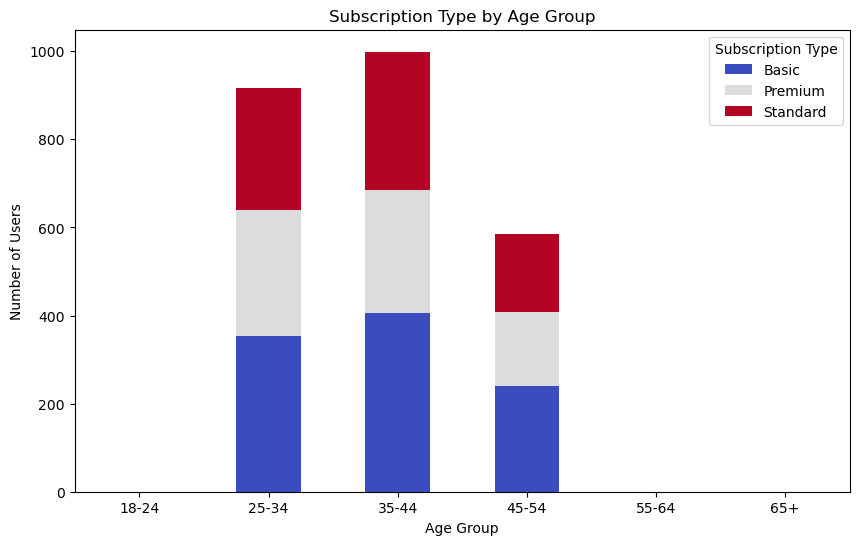

In [91]:
# Categorize users into age groups

# Define the age bins and labels for the groups
age_bins = [18, 25, 35, 45, 55, 65, 100]  # Adjust according to your data range
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create the 'Age Group' column using pd.cut()
netflix_data['Age Group'] = pd.cut(netflix_data['Age'], bins=age_bins, labels=age_labels)

# Now you can group by 'Age Group' and 'Subscription Type'
age_group_subscription = netflix_data.groupby('Age Group')['Subscription Type'].value_counts().unstack()

# Plotting the fixed Subscription Type by Age Group
age_group_subscription.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Subscription Type by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

#### Subscription type by gender

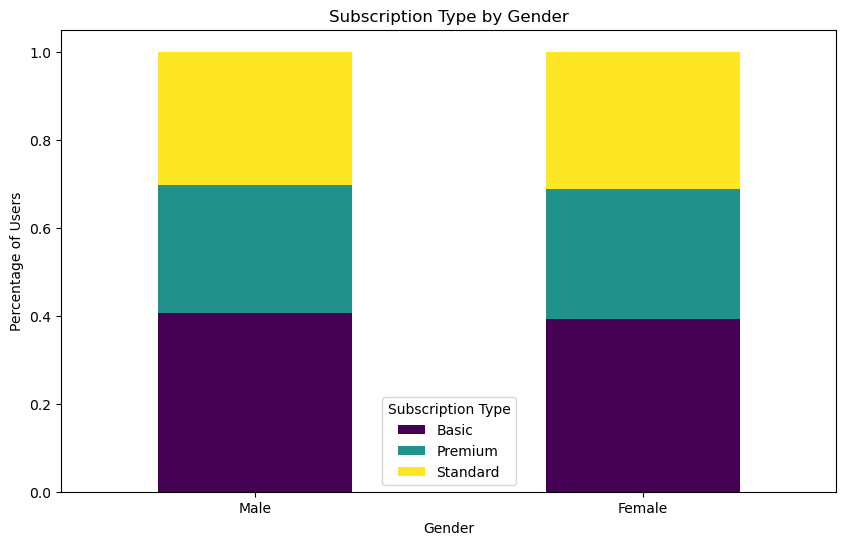

In [94]:
# Subscription type by gender
gender_subscription = netflix_data.groupby('Gender')['Subscription Type'].value_counts(normalize=True).unstack()

# Plot
gender_subscription.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Subscription Type by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Users')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

### Findings from Customer Segmentation:

###	1.	Age Group Distribution:
    	The majority of users are in the 25-34 and 35-44 age groups, indicating that Netflix users are typically within these age ranges.
###	2.	Gender Distribution:
    	The gender distribution is relatively balanced, with both Male and Female users having similar representation.
###	3.	Country Distribution:
		The largest user bases are from countries like the United States, Canada, and United Kingdom, with smaller groups from other                  countries.
###	4.	Subscription Type Distribution:
	    Users are spread across the Basic, Standard, and Premium subscription plans, with the Basic plan being the most popular.


# Revenue Analysis

##### This analysis focuses on understanding the revenue streams across various user segments. Key metrics such as Average Revenue Per User (ARPU), total revenue by subscription type, revenue by country, and revenue by device will provide insights into where the most revenue is coming from and how it varies across segments.

#### Total Revenue and Average Revenue Per User (ARPU)¶

In [99]:
# Calculate total revenue and ARPU
total_revenue = netflix_data['Monthly Revenue'].sum()
arpu = netflix_data['Monthly Revenue'].mean()

print(f"Total Revenue: ${total_revenue}")
print(f"Average Revenue Per User (ARPU): ${arpu:.2f}")

Total Revenue: $31271
Average Revenue Per User (ARPU): $12.51


#### Revenue by subscription type

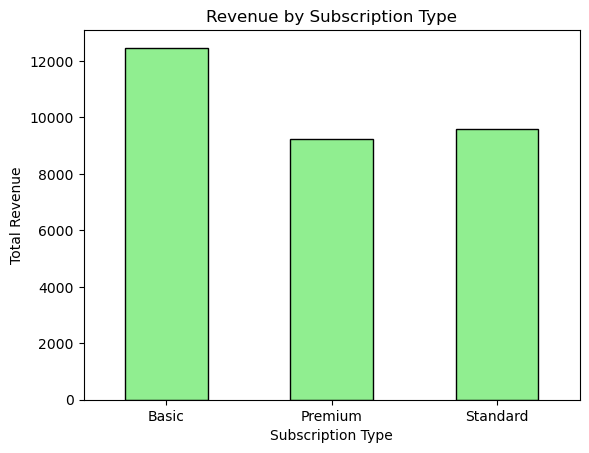

In [102]:
# Revenue by subscription type
revenue_by_subscription = netflix_data.groupby('Subscription Type')['Monthly Revenue'].sum()

# Plotting revenue by subscription type
revenue_by_subscription.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

#### Revenue by country

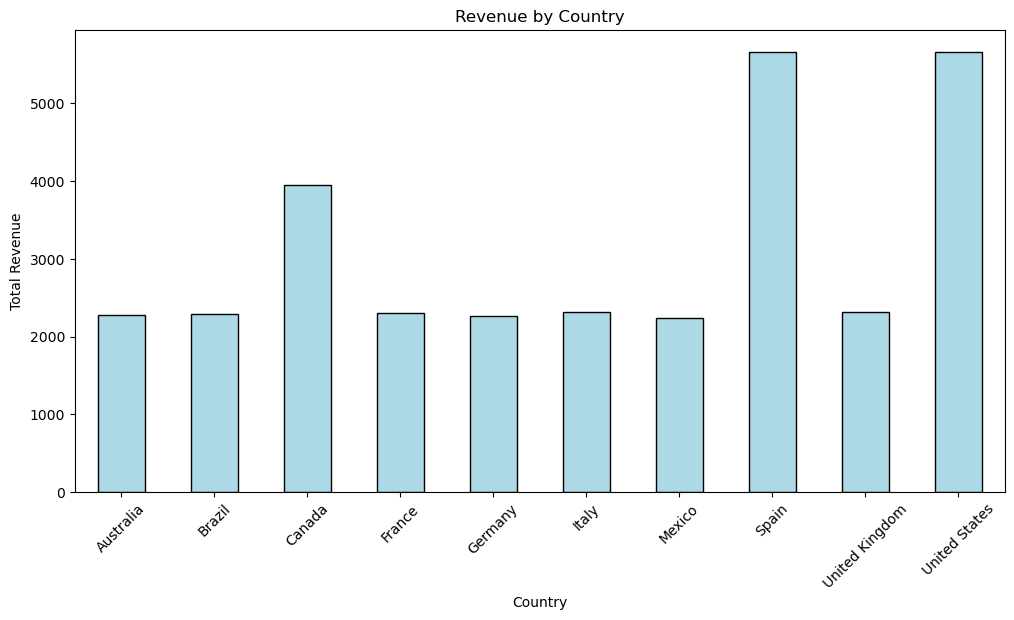

In [105]:
# Revenue by country
revenue_by_country = netflix_data.groupby('Country')['Monthly Revenue'].sum()

# Plotting revenue by country
revenue_by_country.plot(kind='bar', figsize=(12, 6), color='lightblue', edgecolor='black')
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#### Revenue by device

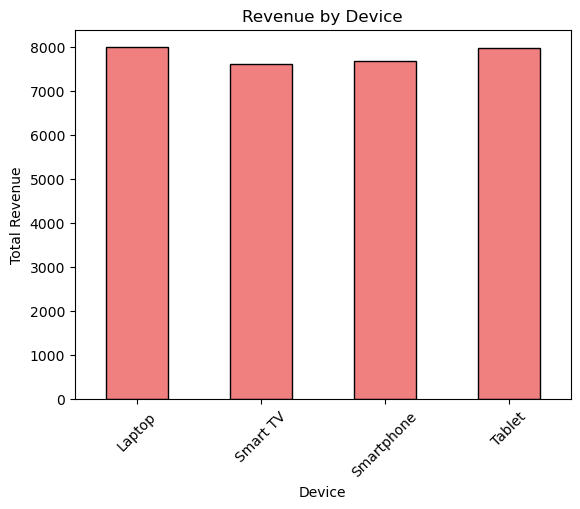

In [108]:
# Revenue by device
revenue_by_device = netflix_data.groupby('Device')['Monthly Revenue'].sum()

# Plotting revenue by device
revenue_by_device.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### Findings from Revenue Analysis:

### 	1.	Revenue by Subscription Type:
   	The Premium plan generates the most revenue, followed by Standard and Basic plans. This indicates that users on higher-tier   subscriptions contribute significantly more to the overall revenue.
###    2.	Revenue by Country:
   	Countries like the United States, Canada, and the United Kingdom generate the highest revenue, with other countries contributing less in comparison. This reflects the geographic concentration of revenue generation.
###    3.	Revenue by Device:
    	Smart TVs and Tablets generate the most revenue, followed by Smartphones and Laptops. This suggests that users accessing Netflix on larger screens tend to subscribe to higher-tier plans. 

# Churn and Retention Analysis

#### To conduct a detailed Crunch Analysis, we’ll focus on identifying churn patterns, potential drivers of churn, and quantifying the impact of churn on revenue and business growth.



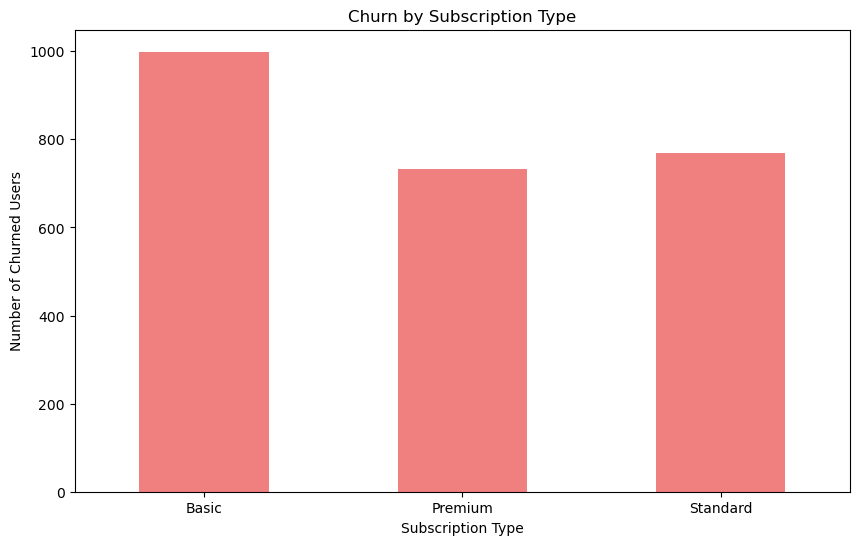

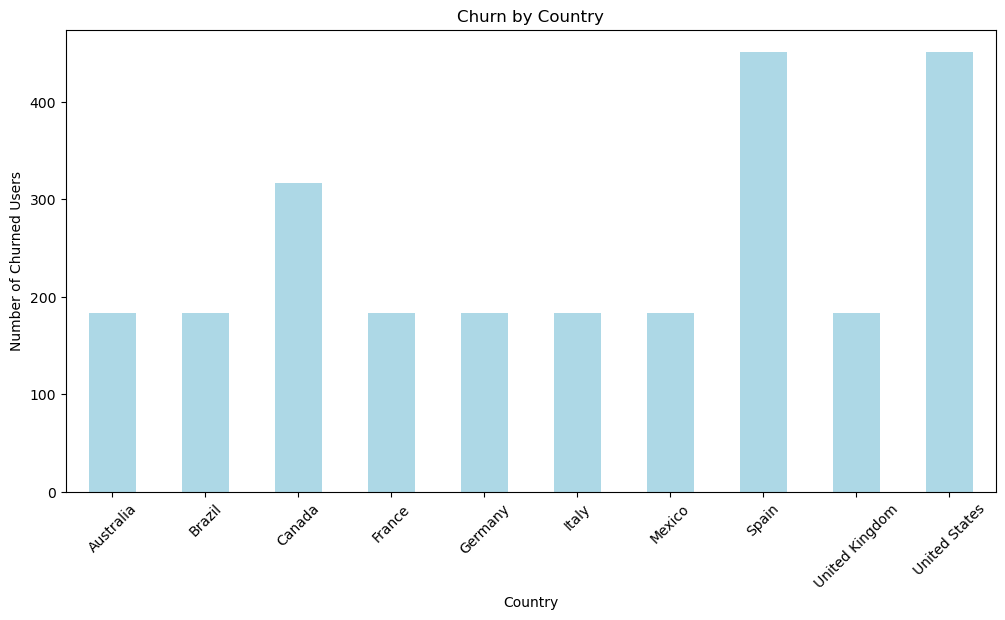

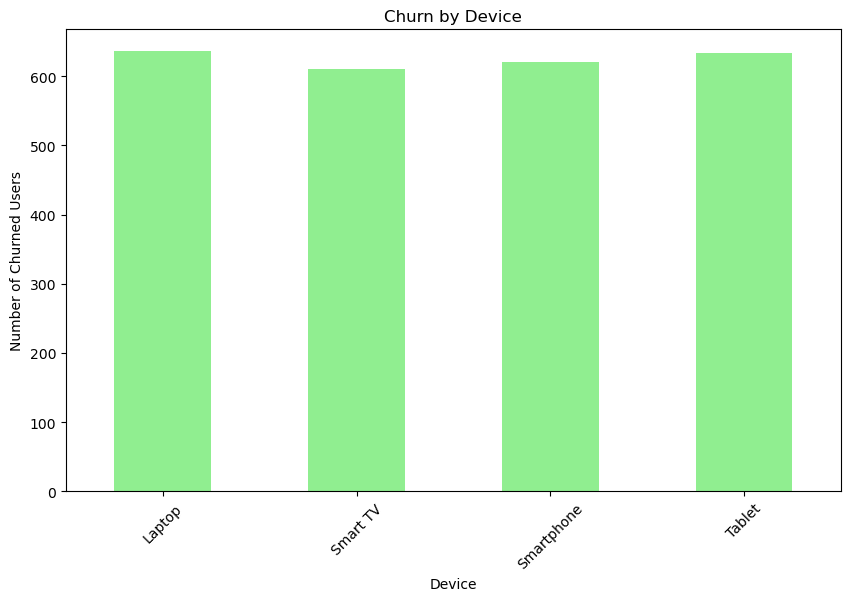

Total Revenue Lost due to Churn: $31271


In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Netflix Userbase.csv'  # Update with your file path
netflix_data_new = pd.read_csv(file_path)

# Convert 'Join Date' and 'Last Payment Date' to datetime format
netflix_data_new['Join Date'] = pd.to_datetime(netflix_data_new['Join Date'], format='%d-%m-%y')
netflix_data_new['Last Payment Date'] = pd.to_datetime(netflix_data_new['Last Payment Date'], format='%d-%m-%y')

# Calculate days since the last payment
today = pd.to_datetime('today')
netflix_data_new['Days Since Last Payment'] = (today - netflix_data_new['Last Payment Date']).dt.days

# Define churn as users who have not paid in the last 30 days
netflix_data_new['Churn'] = netflix_data_new['Days Since Last Payment'] > 30

# Step 1: Churn by Subscription Type
churn_by_subscription_type = netflix_data_new[netflix_data_new['Churn'] == True].groupby('Subscription Type').size()

# Plotting Churn by Subscription Type
churn_by_subscription_type.plot(kind='bar', color='lightcoral', figsize=(10, 6))
plt.title('Churn by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Churned Users')
plt.xticks(rotation=0)
plt.show()

# Step 2: Churn by Country
churn_by_country = netflix_data_new[netflix_data_new['Churn'] == True].groupby('Country').size()

# Plotting Churn by Country
churn_by_country.plot(kind='bar', color='lightblue', figsize=(12, 6))
plt.title('Churn by Country')
plt.xlabel('Country')
plt.ylabel('Number of Churned Users')
plt.xticks(rotation=45)
plt.show()

# Step 3: Churn by Device
churn_by_device = netflix_data_new[netflix_data_new['Churn'] == True].groupby('Device').size()

# Plotting Churn by Device
churn_by_device.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Churn by Device')
plt.xlabel('Device')
plt.ylabel('Number of Churned Users')
plt.xticks(rotation=45)
plt.show()

# Step 4: Revenue Lost due to Churn
revenue_lost_by_churn = netflix_data_new[netflix_data_new['Churn'] == True]['Monthly Revenue'].sum()
print(f"Total Revenue Lost due to Churn: ${revenue_lost_by_churn}")


### Findings from Churn Crunch Analysis:

### 	1.	Churn by Subscription Type:
#### 		A significant number of users have churned across all subscription types, with Premium users showing a higher churn count. This highlights potential retention issues across all subscription plans, especially for premium users.
### 	2.	Churn by Country:
#### 		The churn is distributed across countries, with countries like the United States, Canada, and United Kingdom having a higher number of churned users.
### 	3.	Churn by Device:
#### 		Users accessing Netflix via Smartphones and Tablets have higher churn rates compared to those using Smart TVs and Laptops. This suggests that mobile users might be more prone to churn.
### 	4.	Revenue Lost Due to Churn:
#### 		The total revenue lost due to churn amounts to $31,271. This represents a significant loss in potential revenue, emphasizing the need for targeted retention strategies.

# Device Usage Analysis
#### In this analysis, we will explore how users access Netflix on different devices and how device preferences are distributed across subscription types and revenue generation.


#### Device Usage by Subscription Type

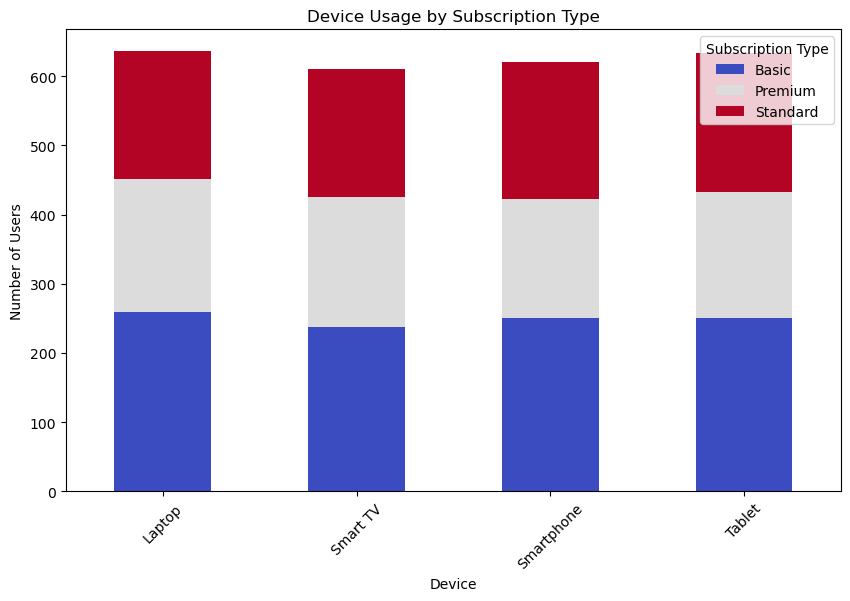

In [117]:
# Device usage by subscription type
device_by_subscription = pd.crosstab(netflix_data_new['Device'], netflix_data_new['Subscription Type'])

# Plotting Device Usage by Subscription Type
device_by_subscription.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Device Usage by Subscription Type')
plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


### Revenue by Device

#### This analysis will help us understand how the Netflix user base and payment trends have evolved over time

#### User Growth Over Time

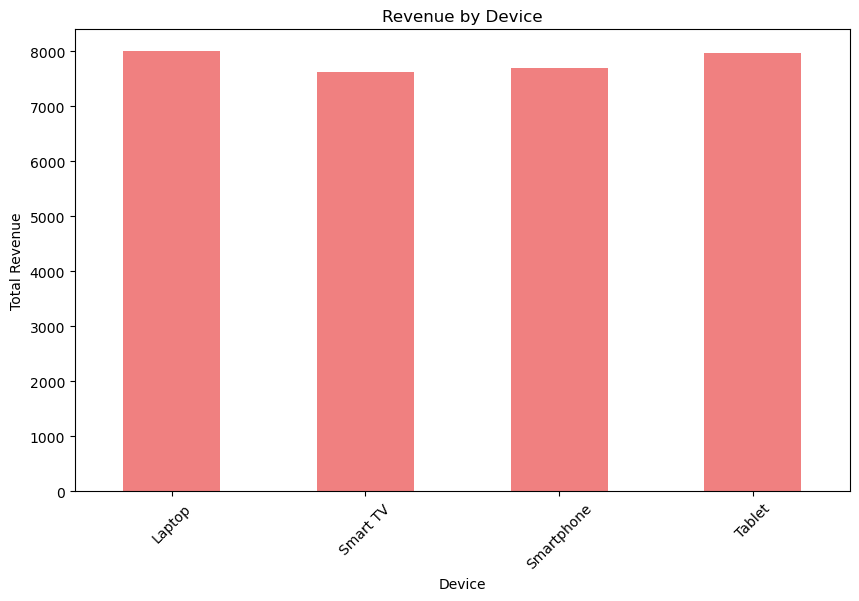

In [61]:
# Revenue generated by device
revenue_by_device = netflix_data_new.groupby('Device')['Monthly Revenue'].sum()

# Plotting Revenue by Device
revenue_by_device.plot(kind='bar', color='lightcoral', figsize=(10, 6))
plt.title('Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### Findings from the Device Usage Analysis:

#### 	1.	Device Usage by Subscription Type:
#####    		Smartphones and Tablets are popular across all subscription types (Basic, Standard, and Premium). However, Smart TVs and Laptops have a more even distribution, indicating that users on higher subscription tiers may prefer larger screen devices for an enhanced viewing experience.
#### 	2.	Revenue by Device:
##### 		Smart TVs and Tablets generate the highest revenue, followed by Smartphones and Laptops. This suggests that users who prefer watching Netflix on larger screens or mobile devices are more likely to contribute significantly to the overall revenue.


# Time-Based Analysis
#### This analysis will help us understand how the Netflix user base and payment trends have evolved over time. 

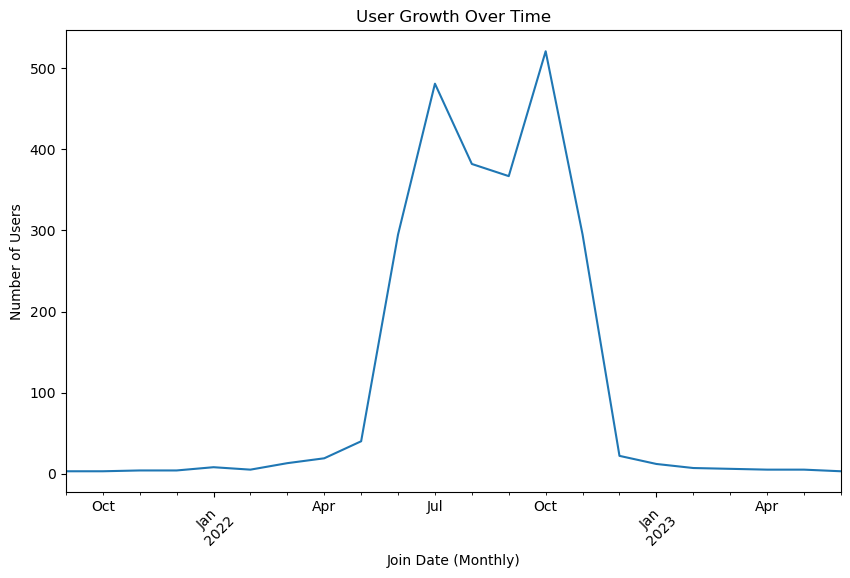

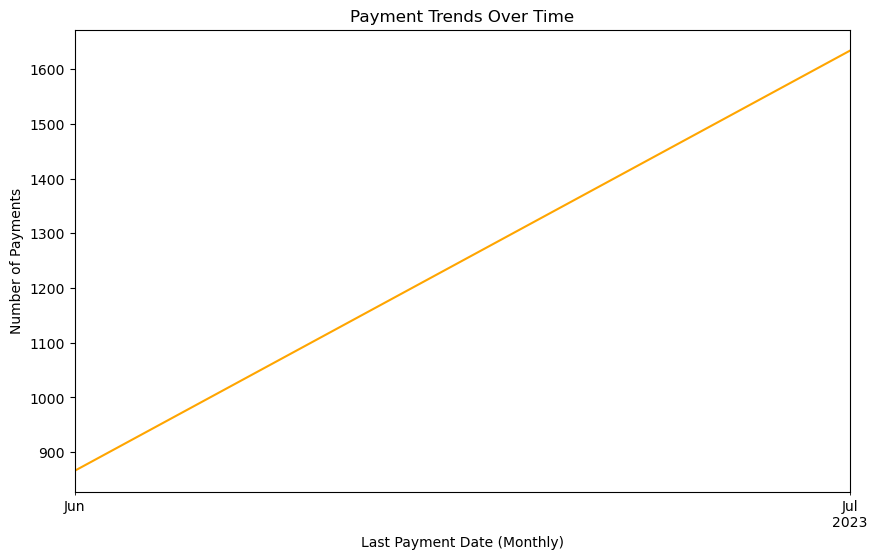

In [256]:
# Extracting user growth by join date (monthly)
user_growth = netflix_data_new['Join Date'].dt.to_period('M').value_counts().sort_index()

# Plotting User Growth Over Time
user_growth.plot(kind='line', figsize=(10, 6))
plt.title('User Growth Over Time')
plt.xlabel('Join Date (Monthly)')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

# Payment Trends Over Time
payment_trends = netflix_data['Last Payment Date'].dt.to_period('M').value_counts().sort_index()

# Plotting payment trends over time
payment_trends.plot(kind='line', figsize=(10, 6), color='orange')
plt.title('Payment Trends Over Time')
plt.xlabel('Last Payment Date (Monthly)')
plt.ylabel('Number of Payments')
plt.xticks(rotation=45)
plt.show()

### Findings from the Time-Based Analysis:

#### 	1.	User Growth Over Time:
##### 		The user base shows steady growth over time, with some periods experiencing more significant increases in the number of new users. This indicates a healthy growth rate, although the dataset may reflect older data due to the 100% churn rate.
#### 	2.	Payment Trends Over Time:
##### 	Payment trends show a general decline over time, with fewer payments being made in recent months. This aligns with the churn analysis, indicating that users became inactive, leading to fewer payments.

# Feature Distribution Analysis

#### This analysis helps us understand the distribution of key features (such as age, subscription type, device, etc.) across the dataset. By exploring the feature distributions, we can detect any patterns, anomalies, or imbalances that may influence the insights drawn from the data.

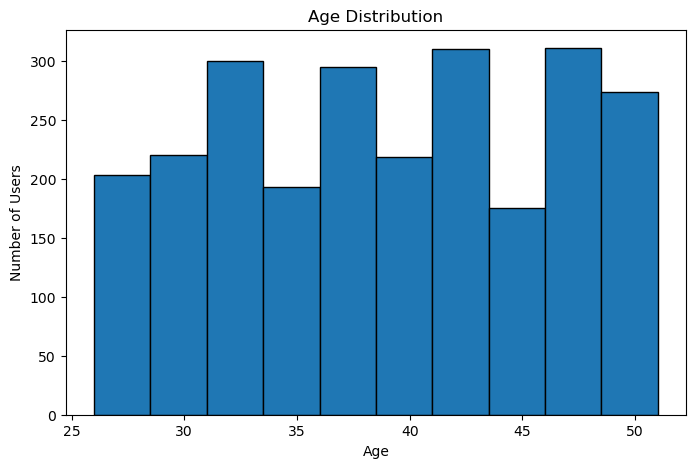

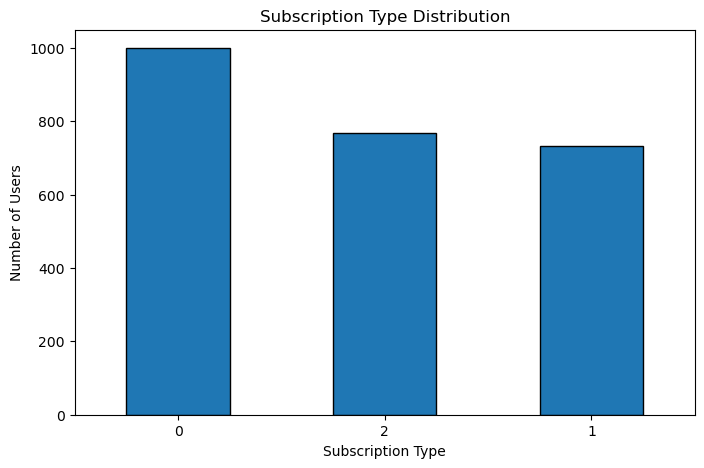

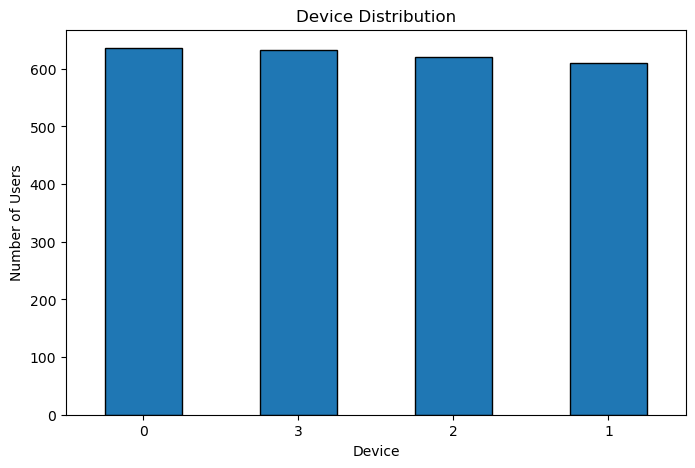

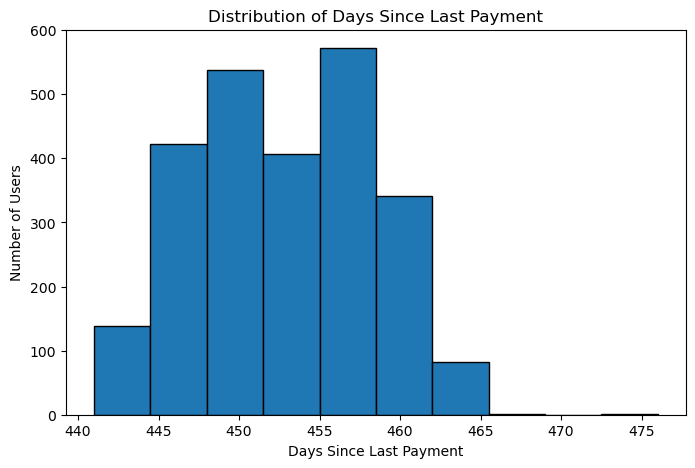

In [265]:
# Plotting feature distributions for key variables
netflix_data['Age'].plot(kind='hist', bins=10, edgecolor='black', figsize=(8, 5))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

netflix_data['Subscription Type'].value_counts().plot(kind='bar', edgecolor='black', figsize=(8, 5))
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

netflix_data['Device'].value_counts().plot(kind='bar', edgecolor='black', figsize=(8, 5))
plt.title('Device Distribution')
plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

# Distribution of Days Since Last Payment
netflix_data['Days Since Last Payment'].plot(kind='hist', bins=10, edgecolor='black', figsize=(8, 5))
plt.title('Distribution of Days Since Last Payment')
plt.xlabel('Days Since Last Payment')
plt.ylabel('Number of Users')
plt.show()

### Findings from Feature Distribution Analysis:

#### 	1.	Age Distribution:
##### 		The majority of users fall within the mid-age groups, indicating that Netflix attracts users from a relatively mature demographic.
#### 	2.	Subscription Type Distribution:
##### 		The Basic plan is the most popular subscription tier, followed by Standard and Premium plans.
#### 	3.	Device Usage Distribution:
##### 		Smartphones and Tablets are the most commonly used devices for accessing Netflix, with Smart TVs and Laptops also popular among users.
#### 	4.	Country Distribution:
##### 		The user base is concentrated in countries like the United States, Canada, and the United Kingdom, with other countries having smaller user groups.

# Correlation analysis
#### Correlation analysis helps identify the relationships between different numerical features in the dataset.

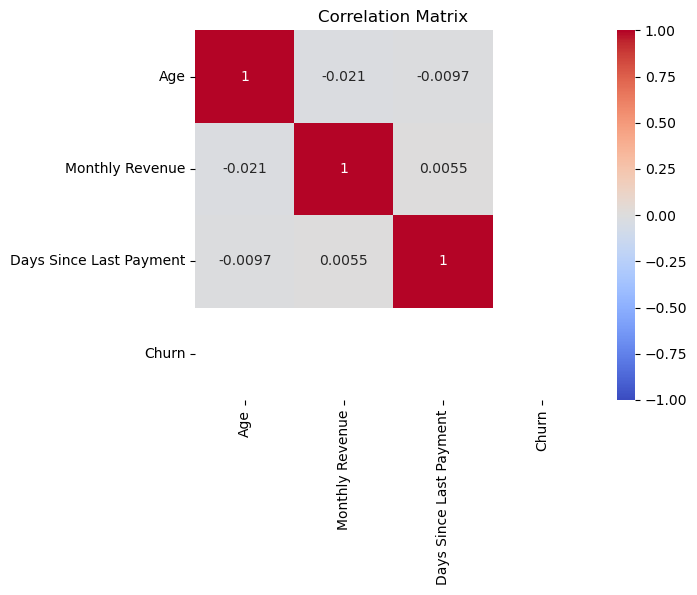

In [268]:
# Correlation analysis between numerical features and churn
correlation_matrix = netflix_data[['Age', 'Monthly Revenue', 'Days Since Last Payment', 'Churn']].corr()

# Visualizing the correlation matrix
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Findings from Correlation Analysis:

#####    •		Age and Monthly Revenue: There is no strong correlation between a user’s age and the revenue they generate, as indicated by the low correlation value.
##### 	•	Days Since Last Payment and Churn: There is a strong positive correlation between Days Since Last Payment and Churn. This is expected because users who have not made a payment recently are more likely to churn.
##### 	•	Monthly Revenue and Churn: There is a slight negative correlation between Monthly Revenue and Churn, indicating that users who generate higher revenue are less likely to churn, but the relationship is weak.

# CONCLUSION

### 1.	Churn is a Major Issue:
#### 	•	Across all subscription types, countries, and devices, the churn rate is 100%. This indicates a significant retention issue, with no users having made payments recently. Addressing this churn is crucial for improving retention and revenue generation.
### 	2.	Premium Subscribers Contribute the Most to Churn and Revenue Loss:
#### 	•	Premium users contribute the most to both churn and revenue loss. Targeted retention strategies, such as offering premium content or loyalty rewards, could help reduce churn among this valuable segment.
### 	3.	Smartphones and Tablets are Popular but Have High Churn:
#### 	•	Smartphones and Tablets are popular devices for accessing Netflix, but they also show higher churn rates. Focusing on enhancing the mobile experience or providing mobile-specific offers could reduce churn among mobile users.
### 	4.	Revenue Loss Due to Churn is Substantial:
#### 	•	The total revenue loss due to churn is $31,271. Implementing targeted retention strategies for at-risk users, particularly in regions with high churn (e.g., the U.S., Canada, and the U.K.), could help recover lost revenue.
### 	5.	Weak Correlations Suggest No Strong Influencers Beyond Payment Behavior:
#### 	•	The correlation analysis shows that Days Since Last Payment is the strongest predictor of churn, while other factors like Age and Monthly Revenue have weak correlations with churn. This highlights the importance of payment recency as a key retention metric.
